In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [10]:
# 월별 통합 데이터 = df
df = pd.read_csv('../pre_data/월별_통합_모델링용.csv',index_col=0)
df = df.drop(columns='date')
df.head()

,닭고기가격,병아리(원/수),hot_day,import amount,feedprice,oil_avg,도축,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,3202,250,0,8754,533.6,107.066111,58873,59981,18465,0.25,3.25
2,3668,420,0,10098,529.9,112.537302,55879,56019,16634,0.75,3.25
3,4169,500,0,10836,527.9,117.745606,58750,50899,16317,0.25,3.25
4,3399,332,0,13412,526.3,113.723667,60940,53879,15882,0.25,3.25
5,3255,200,0,14519,526.2,104.184710,73505,55403,16798,0.25,3.25


In [7]:
# 일별 통합 데이터 = data
data = pd.read_csv('../pre_data/일별_통합_모델링용.csv',index_col=0)
data = data.drop(columns=['한국기준금리', 'date'])
data

,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리
0,4047,400,76.703333,111396,25177,0.25
1,4047,400,77.850000,111396,25411,0.25
2,3895,400,77.566667,112019,26891,0.25
3,3895,400,77.130000,110865,26936,0.25
4,3743,400,76.530000,109225,26993,0.25
...,...,...,...,...,...,...
2991,3166,200,108.180000,58380,19570,0.75
2992,3118,200,108.260000,58870,19830,0.75
2993,3118,300,108.470000,61700,20300,0.75
2994,3118,300,107.000000,61030,20330,0.75


# 월별

In [11]:
x = df.drop(columns='닭고기가격')
y = df['닭고기가격']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=44)

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predctions = model.predict(X_test)

In [14]:
model.score(X_test,y_test)

-0.09078673857065067

[Text(0.537303664921466, 0.9545454545454546, '도축 <= 78638.0\nsquared_error = 205410.855\nsamples = 84\nvalue = 3252.048'),
 Text(0.25785340314136124, 0.8636363636363636, '병아리(원/수) <= 454.0\nsquared_error = 165817.934\nsamples = 36\nvalue = 3544.806'),
 Text(0.17146596858638743, 0.7727272727272727, '소_소비자가_int <= 67882.5\nsquared_error = 91045.202\nsamples = 21\nvalue = 3350.524'),
 Text(0.112565445026178, 0.6818181818181818, 'oil_avg <= 102.683\nsquared_error = 42810.184\nsamples = 16\nvalue = 3484.938'),
 Text(0.05235602094240838, 0.5909090909090909, '돼지_소비자가_int <= 16556.5\nsquared_error = 25355.984\nsamples = 8\nvalue = 3627.625'),
 Text(0.020942408376963352, 0.5, '돼지_소비자가_int <= 14513.5\nsquared_error = 12003.556\nsamples = 3\nvalue = 3449.667'),
 Text(0.010471204188481676, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 3295.0'),
 Text(0.031413612565445025, 0.4090909090909091, '도축 <= 64724.0\nsquared_error = 64.0\nsamples = 2\nvalue = 3527.0'),
 Text(0.0209424083769

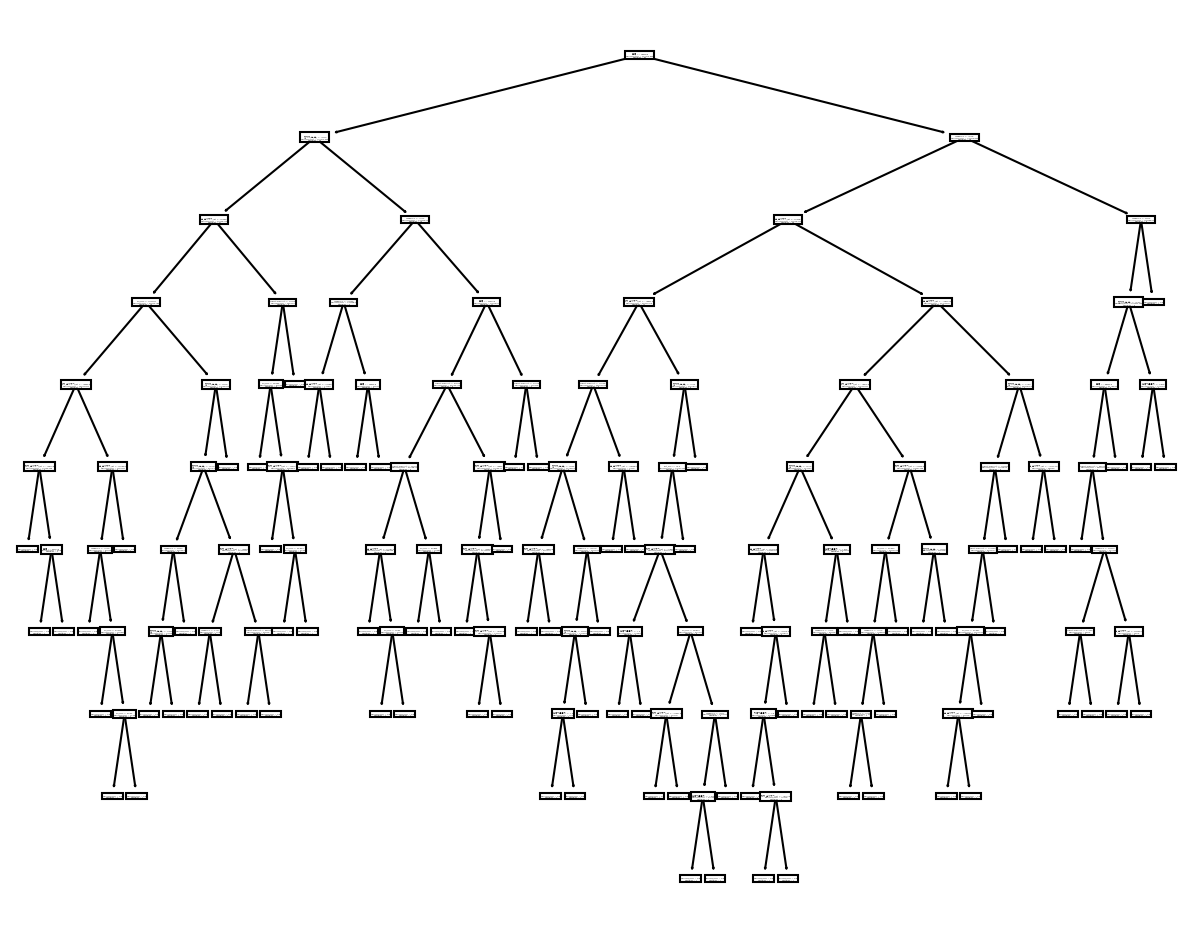

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8),dpi=150)
plot_tree(model, feature_names=x.columns)

# 일별

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# feature, target 분리
feature = data.drop(columns='price')
target = data['price']

X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=1)

dt_regr = DecisionTreeRegressor(max_depth=5)

dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [9]:
from sklearn.metrics import r2_score


y_pred = dt_regr.predict(X_test)
print("단순 결정 트리 회귀 : {:.4f}".format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀 : 0.5073
